# Plotting Figure 9
This script is to reproduce Figure 9 from the paper.  
Please be aware that you first need to run the script **inference_full** in order to have all the results necessary.

## Checking GPU Availability
First, let's see if we have a GPU available. It is highly recommended to utilize a GPU, although it is also possible to run this experiment on the CPU at a much slower rate.

In [1]:
import matplotlib.pyplot as plt

from experiment import *
from experiment_config import *
from loss_utils import getMSELoss
from data_utils import get_result_path, load_results

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using " + str(device) + " for evaluation...")


using cuda for evaluation...


## Defining Locations of Ground Truth Masks and Results

In [2]:
mask_dir = os.path.join(os.getcwd(), 'data', 'masks', 'test')
hybrid_input_path = os.path.join(os.getcwd(), 'data', 'hybrid', 'test')
e2e_input_path = os.path.join(os.getcwd(), 'data', 'end2end', 'test')

Notice, we just take the results from a single model for each approach, since we previously showed that the variance of several runs is negligible.

In [3]:
lrg_hybrid_model_file = os.path.join(os.getcwd(), 'data', 'hybrid', 'models', 'lrg', '80k',
                                     '2020-4-25_15-5-29.503889', 'models', 'best_model.pth')
lrg_hybrid_results_path = get_result_path(lrg_hybrid_model_file, hybrid_input_path)
lrg_hybrid_results = load_results(lrg_hybrid_results_path, mask_dir, getHybridPrefixes())

cmp_hybrid_model_file = os.path.join(os.getcwd(), 'data', 'hybrid', 'models', 'cmp', '80k',
                                     '2020-4-25_13-32-31.889297', 'models', 'best_model.pth')
cmp_hybrid_results_path = get_result_path(cmp_hybrid_model_file, hybrid_input_path)
cmp_hybrid_results = load_results(cmp_hybrid_results_path, mask_dir, getHybridPrefixes())

lrg_e2e_model_file = os.path.join(os.getcwd(), 'data', 'end2end', 'models', 'lrg', '80k',
                                     '2020-4-17_13-0-34.508471', 'models', 'best_model.pth')
lrg_e2e_results_path = get_result_path(lrg_e2e_model_file, e2e_input_path)
lrg_e2e_results = load_results(lrg_e2e_results_path, mask_dir, getE2EPrefixes())

cmp_e2e_model_file = os.path.join(os.getcwd(), 'data', 'end2end', 'models', 'cmp', '80k',
                                     '2020-4-17_13-17-24.661566', 'models', 'best_model.pth')
cmp_e2e_results_path = get_result_path(cmp_e2e_model_file, e2e_input_path)
cmp_e2e_results = load_results(cmp_e2e_results_path, mask_dir, getE2EPrefixes())

## Defining Locations of Baseline Results

In [4]:
fkmig_results_path = os.path.join(os.getcwd(), 'data', 'baselines', 'test')
fkmig_results = load_results(fkmig_results_path, mask_dir, getFKMIGPrefixes())

## Loading and Computing MSE

In [5]:
snr_list = ["SNR_70", "SNR_60", "SNR_50", "SNR_40", "SNR_30", "SNR_20", "SNR_10", "SNR_0", "SNR_-10", "SNR_-20"]
snr_list.reverse()

results_template = np.zeros((len(snr_list),1))

all_unet_mse_results = np.zeros((results_template.shape))
all_small_unet_mse_results = np.zeros((results_template.shape))
all_e2e_unet_mse_results = np.zeros((results_template.shape))
all_e2e_small_unet_mse_results = np.zeros((results_template.shape))
all_fkmig_mse_results = np.zeros((results_template.shape))


i=0
for snr in snr_list:
    print("loading lrg_hybrid_results: " + str(snr))
    dataset = lrg_hybrid_results[snr]    
    data_loader = get_dataloader(dataset)
    all_unet_mse_results[i] = getMSELoss(data_loader)
    print('MSE: {}'.format(np.mean(all_unet_mse_results[i])))  

    print("loading lrg_e2e_results: " + str(snr))
    dataset = lrg_e2e_results[snr]    
    data_loader = get_dataloader(dataset)
    all_e2e_unet_mse_results[i] = getMSELoss(data_loader)
    print('MSE: {}'.format(np.mean(all_e2e_unet_mse_results[i])))  

    
    print("loading cmp_hybrid_results: " + str(snr))
    dataset = cmp_hybrid_results[snr]    
    data_loader = get_dataloader(dataset)
    all_small_unet_mse_results[i] = getMSELoss(data_loader)
    print('MSE: {}'.format(np.mean(all_small_unet_mse_results[i])))  

    print("loading cmp_e2e_results: " + str(snr))
    dataset = cmp_e2e_results[snr]    
    data_loader = get_dataloader(dataset)
    all_e2e_small_unet_mse_results[i] = getMSELoss(data_loader)
    print('MSE: {}'.format(np.mean(all_e2e_small_unet_mse_results[i])))  
    

    print("loading fkmig_results: " + str(snr))
    dataset = fkmig_results[snr]    
    data_loader = get_dataloader(dataset)
    all_fkmig_mse_results[i] = getMSELoss(data_loader)
    print('MSE: {}'.format(np.mean(all_fkmig_mse_results[i])))  

    i+=1

loading lrg_hybrid_results: SNR_-20
MSE: 0.008803126206621527
loading lrg_e2e_results: SNR_-20
MSE: 0.009651690484024584
loading cmp_hybrid_results: SNR_-20
MSE: 0.010185906519182027
loading cmp_e2e_results: SNR_-20
MSE: 0.011026143450289965
loading fkmig_results: SNR_-20
MSE: 0.014449673630297184
loading lrg_hybrid_results: SNR_-10
MSE: 0.005964732066495344
loading lrg_e2e_results: SNR_-10
MSE: 0.006981522757560015
loading cmp_hybrid_results: SNR_-10
MSE: 0.007679600892588496
loading cmp_e2e_results: SNR_-10
MSE: 0.00894622722407803
loading fkmig_results: SNR_-10
MSE: 0.013186568398959935
loading lrg_hybrid_results: SNR_0
MSE: 0.004039151470642537
loading lrg_e2e_results: SNR_0
MSE: 0.00484295413363725
loading cmp_hybrid_results: SNR_0
MSE: 0.005714260775130242
loading cmp_e2e_results: SNR_0
MSE: 0.006933301880490034
loading fkmig_results: SNR_0
MSE: 0.012738173082470893
loading lrg_hybrid_results: SNR_10
MSE: 0.0030201928643509746
loading lrg_e2e_results: SNR_10
MSE: 0.00367072905413

## Plotting

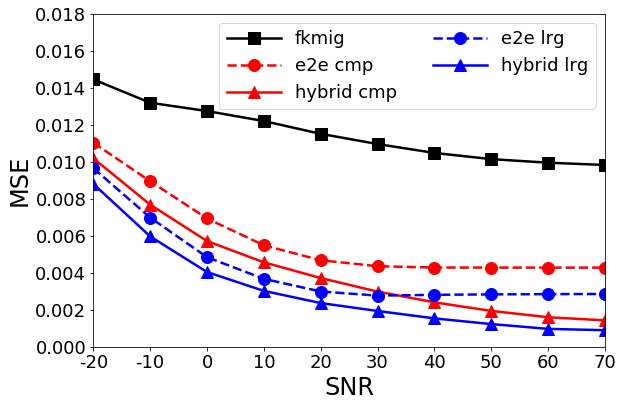

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

snr_val_list = ["70", "60", "50", "40", "30", "20", "10", "0", "-10", "-20"]
snr_val_list.reverse()

SMALL_SIZE = 18
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
#plt.rc('legend', ncol=2)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
params = {'legend.fontsize': SMALL_SIZE,
          'legend.handlelength': 1}
plt.rcParams.update(params)

frame = np.transpose(np.concatenate(([all_fkmig_mse_results], [all_e2e_small_unet_mse_results], [all_small_unet_mse_results], [all_e2e_unet_mse_results], [all_unet_mse_results]), axis=0))

all_results = pd.DataFrame(np.reshape(frame, (10,5)), columns=['fkmig', 'e2e cmp', 'hybrid cmp', 'e2e lrg', 'hybrid lrg'])

fig, ax = plt.subplots(figsize=(9, 6))
styles = ['ks-','ro--','r^-','bo--','b^-'] #  includes colors!
markersize = 12
subax = all_results.plot(ax=ax, style=styles, linewidth=2.5, legend=True, title='', ms=markersize)

subax.set_xticklabels(snr_val_list, rotation=0)
ax.set_ylabel('MSE')
ax.set_xlabel('SNR')
plt.ylim((0.00, 0.018))
plt.legend(loc='best', bbox_to_anchor=(1., 0.55))
plt.legend(handlelength=3, ncol=2)

plt.plot()
plt.tight_layout()
plt.savefig("fkmig_vs_all_vs_SNR.png", dpi=fig.dpi)